In [3]:
# Add events to .set EEGLAB files

In [15]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import time

In [2]:
path = 'E:\StroopEEG'
trg_path = 'D:\EEGLAB\SA20140304\20140304_1418_trg.txt'
eeglab_files = os.listdir(path)

In [3]:
eeglab_files = [x for x in eeglab_files if '.zip' not in x]
eeglab_files

['SA20131216',
 'SA20140304',
 'SA20140306',
 'SA20140313',
 'SA20140314',
 'SA20140318',
 'SA20140319',
 'SA20140320A',
 'SA20140320B',
 'SA20140324',
 'SA20140325',
 'SA20140327',
 'SA20140331']

In [4]:
def search_folders(path, listdir):
    dict = {}
    for dir in listdir:
        folder_path = os.path.join(path, dir)
        contents = os.listdir(folder_path)
        dict[dir] = [x for x in contents if '.set' in x]
    return dict

In [19]:
eeglab_dict = search_folders(path, eeglab_files)
eeglab_dict

{'SA20131216': ['20131216_1310.set', '20131216_1441.set'],
 'SA20140304': ['20140304_1418.set', '20140304_1614.set'],
 'SA20140306': ['20140306_1133.set', '20140306_1338.set'],
 'SA20140313': ['20140313_1439.set', '20140313_1630.set'],
 'SA20140314': ['20140314_1424.set', '20140314_1553.set'],
 'SA20140318': ['20140318_1043.set', '20140318_1211.set'],
 'SA20140319': ['20140319_1043.set', '20140319_1342.set'],
 'SA20140320A': ['20140320_1040.set', '20140320_1156.set'],
 'SA20140320B': ['20140320_1421.set', '20140320_1543.set'],
 'SA20140324': ['20140324_1441.set', '20140324_1553.set'],
 'SA20140325': ['20140325_1007.set', '20140325_1144.set'],
 'SA20140327': ['20140327_1022.set', '20140327_1241.set'],
 'SA20140331': ['20140331_1753.set']}

In [7]:
# read file
np.random.seed(42)
eeglab_dict_keys = list(eeglab_dict.keys())
eeglab_folder = os.path.join(path,eeglab_dict_keys[1])

eeglab_file = os.path.join(eeglab_folder, eeglab_dict[eeglab_dict_keys[1]][0])
raw = mne.io.read_raw_eeglab(eeglab_file, preload=True, verbose = True)

Reading E:\StroopEEG\SA20140304\20140304_1418.fdt
Reading 0 ... 1273369  =      0.000 ...  2487.049 secs...


In [8]:
raw.info

<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Lm, LE1, Nasium, LE3, LD2, LD5, LC3, LC6, LB1, ...
    chs : list | 129 items (EEG: 128, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 128 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 256.0 Hz
    nchan : int | 129
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 512.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_date : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_inf

In [9]:
events = mne.find_events(raw, min_duration=1/raw.info['sfreq'], shortest_event=1)
events

7932 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


array([[   5552,       0,     131],
       [   5880,       0,      31],
       [   5882,       0,     135],
       ...,
       [1257018,       0,     131],
       [1257241,       0,     134],
       [1257244,       0,     129]], dtype=int64)

In [10]:
# event_id : this dictionary is created from information from Dave's dissertation page 27
concepts={1:'BABY',2:'BELL',3:'BIRD',4:'BURP',5:'DOG',6:'DRUM',
              7:'KNOCK',8:'LAUGH',9:'PHONE',10:'TRAIN',11:'WATER'}

event_id = {'trail_start':  31, 
            'left_button':  131, 
            'right_button': 132,
            'congruent':    133,
            'incongruent':  134,
            'correct':      129,
            'incorrect':    130,
            # targets
            't_baby' :        135,
            't_bell':         136,
            't_bird':         137,
            't_burp':         138,
            't_dog':          139,
            't_drum':         140,
            't_knock':        141,
            't_laugh':        142,
            't_phone':        143,
            't_train':        144,
            't_water':        145,
            #flankers
            'f_baby' :        155,
            'f_bell':         156,
            'f_bird':         157,
            'f_burp':         158,
            'f_dog':          159,
            'f_drum':         160,
            'f_knock':        161,
            'f_laugh':        162,
            'f_phone':        163,
            'f_train':        164,
            'f_water':        165,
}
# event codes 1 - 24 represent flanker and target stim codes. They are NOT explicity defined in dissertation.
for i in range(1,13):
    event_id["flanker_stim_{0}".format(i)] = i
    
for j in range(13, 25):
    event_id["target_stim_{0}".format(j)] = j

In [11]:
epoch = mne.Epochs(raw, events=events, event_id = event_id, preload = True, )

7931 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 7931 events and 359 original time points ...
0 bad epochs dropped


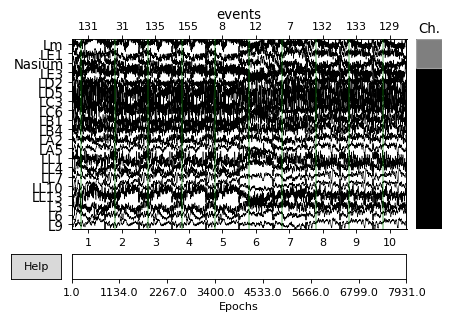

duration:  215.77522706985474


In [18]:
start = time.time()
epoch.plot(n_channels=20, n_epochs=10,title="events")
end = time.time()
duration = end - start
print("duration: ", duration)
#this plot took way too long to load!

In [7]:
#manually add events. (not needed anymore.)
# read .trg file
file = open(os.path.join(path, eeglab_files[-1]), 'r')

In [8]:
line_list = []
for line in file:
    line_list.append(line.split())

In [9]:
header = line_list[:1]
line_list = line_list[1:]
events = []
line_list[0][-1] = '0'
for list in line_list:
    a, b,c = list
#     print(list)
    events.append([float (a), int (b), int(c)])

In [10]:
# raw.add_events = event_id

In [36]:
raw.time_as_index(np.arange(0,raw.n_times))

array([        0,       512,      1024, ..., 651963904, 651964416,
       651964928])

In [84]:
# extract events from raw eeglab file.
m_event = mne.find_events(raw, min_duration=1/raw.info['sfreq'], shortest_event= 0.5, initial_event=True)

7932 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


In [85]:
raw.add_events = m_event

In [88]:
np.unique(m_event[:,-1])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  31, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165], dtype=int64)

In [68]:
1/raw.info['sfreq'] + 0.000000001

0.001953126

In [64]:
events = np.array(events)
np.min(events[:,1])

10500.0

In [76]:
len(events)

7966

In [94]:
eeglab_events = mne.io.read_events_eeglab()

No events found, returning empty stim channel ...


In [104]:
raw.add_events = m_event

In [109]:
raw.info['events'] = event_id